# Visualizing Filters of a Convolutional Neural Network

#### Intution: What is the image that maximizes the output of our sub-model at this particular index for the selected filter. Thus, in the training loop, we use gradient **ascend** instead of gradient descent.

## Get a pretrained Model

In [43]:
!nvidia-smi

Fri Mar 19 21:36:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |   5440MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import random

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.4.1


In [ ]:
model = tf.keras.applications.VGG19( # as this model has Conv2D's and MaxPools
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3)
)

#model.summary()

## Get the Layer Output

In [5]:
def get_submodel(layer_name):
    return tf.keras.models.Model(
        model.input,
        model.get_layer(layer_name).output
    )

get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Visualize the Image

In [6]:
def plot_image(image, title='random image'):
    image = image - tf.math.reduce_min(image)
    image = image / tf.math.reduce_max(image)
    plt.imshow(image)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

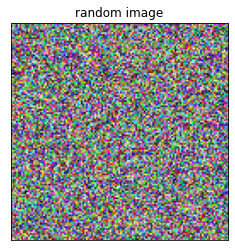

In [7]:
image = tf.random.uniform((128, 128, 3), minval=-0.5, maxval=0.5)
plot_image(image)

## Training Loop

In [33]:
def visualize_filter(layer_name, lr=25, iters=50, f_index=None):
    submodel = get_submodel(layer_name)
    
    num_filters = submodel.output.shape[-1]

    if not f_index:
        f_index = random.randint(0, num_filters - 1)
    
    assert num_filters > f_index, f'f_index ({f_index}) >= num_filters ({num_filters})'

    print(f'Maximizing image for layer {layer_name} and filter {f_index}')

    image = tf.random.uniform((128, 128, 3), minval=-0.5, maxval=0.5)

    for i in range(0, iters):
        with tf.GradientTape() as tape:
            tape.watch(image)
            output = submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
            loss = tf.math.reduce_mean(output)
        grads = tape.gradient(loss, image)
        grads = tf.math.l2_normalize(grads)
        image += grads * lr # ascend - instead of descent
        if(i % 10 == 0):
          print('Iteration %d' %(i), 'Loss value: %3f' %(loss.numpy()))
    plot_image(image, f'{layer_name} ({f_index})')

## Results

In [9]:
print([layer.name for layer in model.layers])

['input_3', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_conv4', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_conv4', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_conv4', 'block5_pool']


Maximizing image for layer block3_conv4 and filter 202
Iteration 0 Loss value: 10.572277
Iteration 10 Loss value: 316.957336
Iteration 20 Loss value: 640.998840
Iteration 30 Loss value: 982.797729
Iteration 40 Loss value: 1328.640991
Iteration 50 Loss value: 1676.548584
Iteration 60 Loss value: 2025.669922
Iteration 70 Loss value: 2375.750244
Iteration 80 Loss value: 2726.487793
Iteration 90 Loss value: 3077.972168
Iteration 100 Loss value: 3429.960693


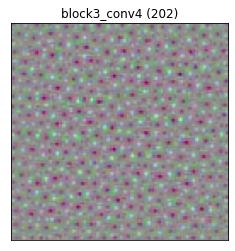

In [36]:
layer_name = 'block3_conv4' #@param ['block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_conv4', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_conv4', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_conv4', 'block5_pool']
visualize_filter(layer_name=layer_name, iters = 101)

Maximizing image for layer block2_conv1 and filter 118
Iteration 0 Loss value: 0.002333
Iteration 10 Loss value: 3.118240
Iteration 20 Loss value: 7.758695
Iteration 30 Loss value: 13.088377
Iteration 40 Loss value: 18.783190
Iteration 50 Loss value: 24.701828
Iteration 60 Loss value: 30.746674
Iteration 70 Loss value: 36.832298
Iteration 80 Loss value: 42.942402
Iteration 90 Loss value: 49.068810
Iteration 100 Loss value: 55.203133


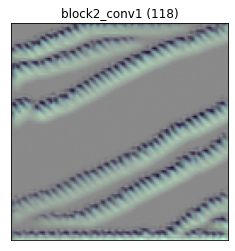

In [38]:
visualize_filter(layer_name='block2_conv1', iters = 101)

Maximizing image for layer block1_conv2 and filter 32
Iteration 0 Loss value: 1.187422
Iteration 10 Loss value: 7.973847
Iteration 20 Loss value: 14.682381
Iteration 30 Loss value: 21.510628
Iteration 40 Loss value: 28.404459
Iteration 50 Loss value: 35.338490
Iteration 60 Loss value: 42.300125
Iteration 70 Loss value: 49.284016
Iteration 80 Loss value: 56.285843
Iteration 90 Loss value: 63.301411
Iteration 100 Loss value: 70.328247


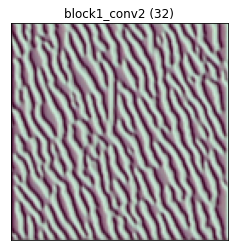

In [41]:
visualize_filter(layer_name='block1_conv2', iters = 101)

Maximizing image for layer block5_conv2 and filter 148
Iteration 0 Loss value: 0.064523
Iteration 10 Loss value: 16.667343
Iteration 20 Loss value: 51.431030
Iteration 30 Loss value: 90.935501
Iteration 40 Loss value: 135.833832
Iteration 50 Loss value: 187.937225
Iteration 60 Loss value: 243.164215
Iteration 70 Loss value: 301.741150
Iteration 80 Loss value: 365.470581
Iteration 90 Loss value: 431.159882
Iteration 100 Loss value: 499.487732


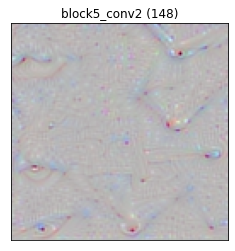

In [42]:
visualize_filter(layer_name='block5_conv2', iters = 101)